In [4]:
import pandas as pd

we can find data here https://pubs.acs.org/doi/10.1021/ci034243x

In [5]:
sol=pd.read_csv('delaney.csv')
print(sol.head(10))

                      Compound ID  measured log(solubility:mol/L)  \
0       1,1,1,2-Tetrachloroethane                           -2.18   
1           1,1,1-Trichloroethane                           -2.00   
2       1,1,2,2-Tetrachloroethane                           -1.74   
3           1,1,2-Trichloroethane                           -1.48   
4  1,1,2-Trichlorotrifluoroethane                           -3.04   
5              1,1-Dichloroethane                           -1.29   
6            1,1-Dichloroethylene                           -1.64   
7             1,1-Diethoxyethane                            -0.43   
8      1,2,3,4-Tetrachlorobenzene                           -4.57   
9    1,2,3,4-Tetrahydronapthalene                           -4.37   

   ESOL predicted log(solubility:mol/L)                SMILES  
0                                -2.794        ClCC(Cl)(Cl)Cl  
1                                -2.232          CC(Cl)(Cl)Cl  
2                                -2.549        C

In [6]:
print(sol.SMILES)

0                                    ClCC(Cl)(Cl)Cl
1                                      CC(Cl)(Cl)Cl
2                                    ClC(Cl)C(Cl)Cl
3                                        ClCC(Cl)Cl
4                               FC(F)(Cl)C(F)(Cl)Cl
                           ...                     
1139                   CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140          CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141         CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O 
1142    Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O
1143                         CNC(=O)Oc1cc(C)cc(C)c1
Name: SMILES, Length: 1144, dtype: object


In [26]:
sol.SMILES[0]

'ClCC(Cl)(Cl)Cl'

In [7]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs


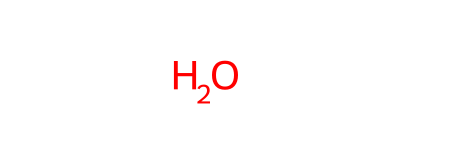

In [66]:
mol = Chem.MolFromSmiles('O')
# Default
mol

In [67]:
print(mol.GetNumAtoms())
print(mol.GetAtomWithIdx(0).GetIsAromatic())



1
False


# Prepearing data for analysis

In [8]:
mol_list=[]
from rdkit import Chem

for mol in sol.SMILES:
    rd_mol=Chem.MolFromSmiles(mol)
    mol_list.append(rd_mol)

len(mol_list)


1144

In [10]:
mol_list=[]
mol_list=[Chem.MolFromSmiles(element) for element in sol.SMILES]
len(mol_list)

1144

# Descriptors prepearing X and Y for machine learning

In [11]:
# desc_MolLogP = Descriptors.MolLogP(mol)
# desc_MolWt = Descriptors.MolWt(mol)
# desc_NumRotatableBonds = Descriptors.NumRotatableBonds(mol)

# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation


from rdkit import Chem
from rdkit.Chem import Descriptors
import numpy as np

def generator(smiles):
    molelem=[Chem.MolFromSmiles(element) for element in smiles]
    database=[]
    
    for mol in molelem:
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_MolWt = Descriptors.MolWt(mol)
        desc_NumRotBonds = Descriptors.NumRotatableBonds(mol)
        row = np.array([desc_MolLogP, desc_MolWt, desc_NumRotBonds])
        database.append(row)
    col_names=["MolLogP", "mol_Wt", "NumRotBonds"]
    df=pd.DataFrame(data=database,columns=col_names)
    return df
        
    
    
    

In [12]:
df=generator(sol.SMILES)
df

,MolLogP,mol_Wt,NumRotBonds
0,2.59540,167.850,0.0
1,2.37650,133.405,0.0
2,2.59380,167.850,1.0
3,2.02890,133.405,1.0
4,2.91890,187.375,1.0
...,...,...,...
1139,1.98820,287.343,8.0
1140,3.42130,286.114,2.0
1141,3.60960,308.333,4.0
1142,2.56214,354.815,3.0


adding another descriptor

In [13]:
def aromatic_proportion(smiles):
    molelem=[Chem.MolFromSmiles(element) for element in smiles]
    ar_prop=[]
    for mol in molelem:
        number_of_atoms=mol.GetNumAtoms()
        aromatic_true_or_false=[mol.GetAtomWithIdx(i).GetIsAromatic() for i in range(number_of_atoms)]
        num_of_aromatic_atoms=sum(aromatic_true_or_false)
        ar_prop.append(num_of_aromatic_atoms/Descriptors.HeavyAtomCount(mol))
    return(ar_prop)
        


In [78]:
aromatic_proportion(sol.SMILES)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6,
 0.6,
 0.6,
 0.6666666666666666,
 0.6666666666666666,
 0.6,
 0.6,
 0.6,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.75,
 0.75,
 0.0,
 0.75,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6,
 0.5,
 0.0,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.4,
 0.75,
 0.0,
 0.75,
 0.75,
 0.0,
 0.0,
 0.75,
 0.8333333333333334,
 0.5,
 0.75,
 0.0,
 0.75,
 0.75,
 0.6,
 0.75,
 0.8333333333333334,
 0.5,
 0.0,
 0.8333333333333334,
 0.0,
 1.0,
 0.0,
 0.0,
 0.9333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9090909090909091,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9090909090909091,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8333333333333334,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9090909090909091,
 0.0,
 0.0,
 0.8571428571428571,
 0.9090909090909091,
 0.9333333333333333,
 0.6666666666666666,
 0.9090909090909091,
 0.9090909090909091,
 0.7692307692307693,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0

In [14]:
df['AP']=aromatic_proportion(sol.SMILES)
df

,MolLogP,mol_Wt,NumRotBonds,AP
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [15]:
X=df.rename(columns={"MolLogP":"MolLogP", "mol_Wt":"mol_Wt", "NumRotBonds":"NumRotBonds","AP":"AromaticProportion"})
X

,MolLogP,mol_Wt,NumRotBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [ ]:
Y=sol.iloc[:,1]
Y

# Linear_Regression Training

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.2)

In [20]:
from sklearn import linear_model
model=linear_model.LinearRegression()

In [21]:
model.fit(X_train,Y_train)

LinearRegression()

In [28]:
Y_pred_train=model.predict(X_train)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
print('Coefficients:', model.coef_)
print('Intercept',model.intercept_)
print('Mean Squared Values (MSV):', mean_squared_error(Y_train,Y_pred_train))
print('R-Squared:', r2_score(Y_train, Y_pred_train))

Coefficients: [-0.75366732 -0.00643071 -0.00135917 -0.36538067]
Intercept 0.2341890209180182
Mean Squared Values (MSV): 0.9945480942705713
R-Squared: 0.7715879124403782


In [32]:
Y_pred_test=model.predict(X_test)
print('Mean Squared Values (MSV):', mean_squared_error(Y_test,Y_pred_test))
print('R-Squared:', r2_score(Y_test, Y_pred_test))

Mean Squared Values (MSV): 1.0744417365244652
R-Squared: 0.7631106899427076
